In [23]:
from langgraph.graph import StateGraph,START,END
from IPython.display import Image,display
from typing import Annotated,TypedDict,List,Tuple

#Your aim is to create a graph which input will be title and it should generate a outline and a complete blog on that title

In [ ]:
#check

In [24]:
#create the typeddict or class
class BlogState(TypedDict):
    Title : str
    Outline: str
    Blog: str

In [25]:
from dotenv import load_dotenv
import os
from langchain_groq import ChatGroq

load_dotenv()
api_key = os.getenv("GROQ_API_KEY")
if not api_key:
    raise EnvironmentError("GROQ_API_KEY not found in .env file")

llm = ChatGroq(model='mixtral-8x7b-32768', api_key=api_key)

In [26]:
def outline_creation(state: BlogState) -> BlogState:
    prompt=f"Create a outline for the title : {state['Title']}"
    outline_response = llm.invoke(prompt)
    state['Outline'] = outline_response
    return state #retun statement is very important

def blog_creation(state: BlogState)-> BlogState:
    prompt = f"Create a complete blog for the topic :{state['Title']} and with the outline: {state['Outline']}"
    blog_response = llm.invoke(prompt)
    state['Blog'] = blog_response
    return state

In [27]:
graph=StateGraph(BlogState)
graph.add_node('outline_node',outline_creation)
graph.add_node('blog_node',blog_creation)

graph.add_edge(START,'outline_node')
graph.add_edge('outline_node','blog_node')
graph.add_edge('blog_node',END)

In [28]:
#compile the workflow
workflow = graph.compile()

In [29]:
initial_state= {'Title':'Samosa'}

In [30]:
final_state= workflow.invoke(initial_state)

In [31]:
final_state

{'Title': 'Samosa',
 'Outline': AIMessage(content="**Title:** Samosa\n**Outline:**\n\nI. **Introduction**\n  - Definition of Samosa\n  - Origins of Samosa\n  - Brief history of Samosa in different cultures\n\nII. **What is a Samosa?**\n  - Description of Samosa's shape and texture\n  - Types of fillings used in Samosas (meat, vegetables, cheese, etc.)\n  - How to assemble and fold a Samosa\n\nIII. **History and Cultural Significance**\n  - Samosa's roots in ancient Central Asia and Middle East\n  - Introduction of Samosas to the Indian subcontinent\n  - Influence of Samosas on various cuisines (Indian, Pakistani, Afghan, etc.)\n\nIV. **Types of Samosas**\n  - Regional variations of Samosas (Indian, Pakistani, Bangladeshi, etc.)\n  - Filling variations (meat, vegetable, cheese, etc.)\n  - Regional cooking techniques (baked, fried, steamed, etc.)\n\nV. **Samosa Recipes**\n  - Basic recipe for making Samosas at home\n  - Vegetarian and non-vegetarian filling variations\n  - Step-by-step g

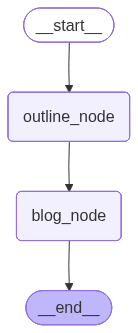

In [33]:
Image(workflow.get_graph().draw_mermaid_png())